In [1]:
from sklearn.svm import LinearSVR 
                                 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

In [2]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import learning_curve 

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 

In [3]:
from sklearn.pipeline import Pipeline 

In [4]:
from sklearn import metrics  
import math

In [5]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [6]:
data=pd.read_excel('data/CO2_20250208.xlsx', sheet_name='CO2 solubility data')

In [7]:
data.head(8)

,No.,IL,x_CO2 (mol/kg sorbent),T (K),P (bar),IF1,IF2,IF3,IF4,IF5,...,IF35,IF36,IF37,IF38,IF39,IF40,IF41,IF42,IF43,IF44
0,1,[Bis(mim)C2][Gly]2,0.8504,313.15,0.1154,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,[Bis(mim)C2][Gly]2,1.1442,313.15,0.2692,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,[Bis(mim)C2][Gly]2,1.4535,313.15,0.5385,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,[Bis(mim)C2][Gly]2,2.3503,313.15,0.8462,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,[Bis(mim)C2][Gly]2,2.4895,313.15,1.3077,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,[Bis(mim)C2][Gly]2,2.5823,313.15,1.7308,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,[Bis(mim)C2][Gly]2,2.6132,313.15,2.0000,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,[Bis(mim)C2][Gly]2,2.6441,313.15,2.9615,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(data.shape)

(2500, 49)


In [9]:
exclude =['No.','IL']
y='x_CO2 (mol/kg sorbent)'
features = [var for var in data.columns if var not in exclude+[y]]
print(len(features), len(exclude))

46 2


In [10]:
data = data.fillna(0)

In [12]:
data[features].info(show_counts = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T (K)    2500 non-null   float64
 1   P (bar)  2500 non-null   float64
 2   IF1      2500 non-null   int64  
 3   IF2      2500 non-null   int64  
 4   IF3      2500 non-null   int64  
 5   IF4      2500 non-null   int64  
 6   IF5      2500 non-null   int64  
 7   IF6      2500 non-null   int64  
 8   IF7      2500 non-null   int64  
 9   IF8      2500 non-null   int64  
 10  IF9      2500 non-null   int64  
 11  IF10     2500 non-null   int64  
 12  IF11     2500 non-null   int64  
 13  IF12     2500 non-null   int64  
 14  IF13     2500 non-null   int64  
 15  IF14     2500 non-null   int64  
 16  IF15     2500 non-null   int64  
 17  IF16     2500 non-null   int64  
 18  IF17     2500 non-null   int64  
 19  IF18     2500 non-null   int64  
 20  IF19     2500 non-null   int64  
 21  IF20     2500 

In [13]:
single_var =[]
for var in features:
    print(var, "----",len(data[var].unique()),data[var].unique()) 
    if len(data[var].unique())==1:
        single_var.append(var)

T (K) ---- 48 [313.15 293.15 303.15 323.15 298.2  298.1  298.   298.3  288.15 298.15
 308.15 318.15 303.16 313.28 313.31 323.32 323.34 333.35 333.36 333.41
 353.55 353.18 295.15 283.1  323.1  348.1  348.2  310.15 333.15 343.15
 303.2  313.2  323.2  343.2  353.2  328.15 338.15 333.2  295.12 353.15
 296.15 373.15 393.15 308.   318.   328.   338.   283.15]
P (bar) ---- 1112 [0.1154 0.2692 0.5385 ... 0.234  0.239  0.419 ]
IF1 ---- 4 [ 2  1  0 10]
IF2 ---- 2 [0 1]
IF3 ---- 3 [0 2 1]
IF4 ---- 2 [0 1]
IF5 ---- 2 [0 1]
IF6 ---- 5 [ 0  1  2  3 10]
IF7 ---- 2 [0 1]
IF8 ---- 2 [0 1]
IF9 ---- 2 [0 1]
IF10 ---- 4 [0 3 2 1]
IF11 ---- 2 [0 1]
IF12 ---- 3 [0 2 1]
IF13 ---- 3 [0 1 2]
IF14 ---- 2 [0 1]
IF15 ---- 11 [ 2  4  5  3 20  1  6  8 12  7 40]
IF16 ---- 32 [  4   2   6   3   5   7   8   1  25  11  14   0  10  31  29  30  32  20
  26  21  12  24  22  33  17  13  16  28 295  58  57  56]
IF17 ---- 3 [0 1 2]
IF18 ---- 2 [0 1]
IF19 ---- 2 [0 1]
IF20 ---- 3 [0 2 1]
IF21 ---- 2 [0 1]
IF22 ---- 14 [ 6 12 

In [14]:
single_var

[]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[features+exclude], data[y], test_size=0.2, random_state=512)
                        
print(X_train.shape, X_test.shape)

(2000, 48) (500, 48)


In [16]:
X_train

,T (K),P (bar),IF1,IF2,IF3,IF4,IF5,IF6,IF7,IF8,...,IF37,IF38,IF39,IF40,IF41,IF42,IF43,IF44,No.,IL
268,288.15,3.5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,269,[Bmim][Gly]
229,298.10,6.9990,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,230,[Bmim][CH3CH2COO]
1891,308.00,1.0000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1892,[P66614][Et2NCOCHCN]
1647,373.15,0.5920,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1648,[P66614][2-CN-Pyrro]
398,308.15,0.1830,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,399,[Bmim][Val]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,308.15,1.5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,637,[Cho][Pro]
2305,303.15,0.7870,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2306,[VBIm][Gly]
1181,313.15,7.2286,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1182,[NH2-pmim][Im]
360,298.10,0.5040,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,361,[Bmim][TFA]


In [17]:
use_feature = [var for var in features if var not in single_var]

In [18]:
single_var

[]

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svr', SVR(kernel='rbf'))])

In [23]:
param_grid =  {
    'svr__C': np.logspace(-3, 3, 100),   
    'svr__gamma': np.logspace(-5, 2, 100) 
}

In [24]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5,                              
    verbose=2,                         
    n_jobs=-1)

In [28]:
grid_search.fit(X_train[use_feature], y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03...
       2.36448941e+00, 2.78255940e+00, 3.27454916e+00, 3.85352859e+00,
       4.53487851e+00, 5.33669923e+00, 6.28029144e+00, 7.39072203e+00,
       8.69749003e+00, 1.02353102e+01, 1.20450354e+01, 1.41747416e+01,
       1.66810054e+01, 1.96304065e+01, 2.31012970e+01, 2.71858824e+01,
       3.19926714e+01, 3.76493581e+01, 4.43062146e+01, 5.21400829e+01,
       6.13590727e+01, 7.22080902e+01, 8.49753436e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error', verbose=2)

In [29]:
print("最佳参数组合:", grid_search.best_params_)
print("最佳模型得分（负MSE）:", grid_search.best_score_)

最佳参数组合: {'svr__C': 46.41588833612782, 'svr__gamma': 0.2848035868435799}
最佳模型得分（负MSE）: -0.21697161883436916


In [30]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test[use_feature], y_test)
print("测试集R²分数:", test_score)

测试集R²分数: 0.842638106353611


In [46]:
from mpl_toolkits.mplot3d import Axes3D

In [47]:
results = grid_search.cv_results_
C_values = results['param_svr__C'].data.astype(float) 
gamma_values = results['param_svr__gamma'].data.astype(float)  
mse_values = -results['mean_test_score']  

In [48]:
C_grid = np.unique(C_values)
gamma_grid = np.unique(gamma_values)
C_mesh, gamma_mesh = np.meshgrid(C_grid, gamma_grid)

In [49]:
mse_mesh = mse_values.reshape(len(gamma_grid), len(C_grid))

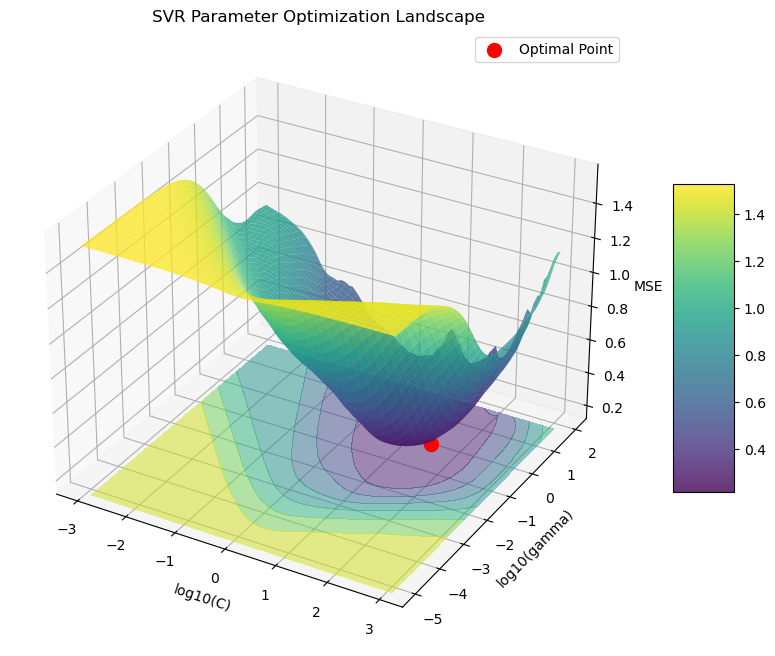

In [54]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面图
surf = ax.plot_surface(
    np.log10(C_mesh),  
    np.log10(gamma_mesh),  
    mse_mesh,
    cmap='viridis',          
    edgecolor='none',
    alpha=0.8
)

# 设置坐标轴标签和标题
ax.set_xlabel('log10(C)')
ax.set_ylabel('log10(gamma)')
ax.set_zlabel('MSE')
ax.set_title('SVR Parameter Optimization Landscape')

# 添加颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 标记最优参数点
best_idx = grid_search.best_index_
best_C = np.log10(C_values[best_idx])
best_gamma = np.log10(gamma_values[best_idx])
best_mse = mse_values[best_idx]
ax.scatter(best_C, best_gamma, best_mse, c='red', s=100, label='Optimal Point')

# 在三维图底部添加等高线投影
ax.contourf(
      np.log10(C_mesh),
      np.log10(gamma_mesh),
      mse_mesh,
      zdir='z',
      offset=np.min(mse_mesh) - 0.1*(np.max(mse_mesh)-np.min(mse_mesh)),
      cmap='viridis',
      alpha=0.5
  )

ax.legend()
plt.show()

In [31]:
svr_new =  SVR(kernel="rbf", C=46, gamma=0.28,epsilon=0.001)
svr_new.fit(X_train[use_feature], y_train)

SVR(C=46, epsilon=0.001, gamma=0.28)

In [32]:
svr_new.get_params()

{'C': 46,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.001,
 'gamma': 0.28,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
train_y_pred = svr_new.predict(X_train[use_feature])
test_y_pred = svr_new.predict(X_test[use_feature])

In [34]:
def get_r2(y_true,y_pred):
    return metrics.r2_score(y_true,y_pred)

def get_rd(y_true,y_pred):
    return (np.array(y_pred)-np.array(y_true))/np.array(y_true)

def get_ard(y_true,y_pred):
    return abs(np.array(y_pred)-np.array(y_true))/np.array(y_true)

def get_aard(y_true,y_pred):
    assert len(y_true)==len(y_pred)
    rd = get_ard(y_true,y_pred)
    return np.mean(rd)
    
def get_mse(y_true, y_pred):
    return metrics.mean_squared_error(y_true, y_pred) 

def get_rmse(y_true,y_pred):              
    return math.sqrt(get_mse(y_true, y_pred))

def get_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred) 


def get_result(y_true, y_pred):
    r2 = get_r2(y_true,y_pred)
    rd = get_rd(y_true, y_pred)
    ard = get_ard(y_true, y_pred)
    aard = get_aard(y_true, y_pred)
    mse = get_mse(y_true, y_pred)
    rmse = get_rmse(y_true,y_pred)
    mae = get_mae(y_true,y_pred)
    print("R2:", r2)
    print('RD:', rd)
    print("ARD:", ard)
    print("AARD:", aard)
    print("mse:", mse)
    print("rmse:", rmse)
    print('mae:', mae)

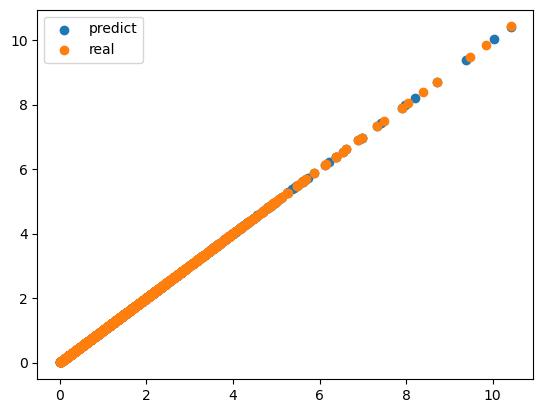

In [36]:
import matplotlib.pyplot as plt

r = len(y_train) + 1

plt.scatter( train_y_pred, train_y_pred ,label="predict")
plt.scatter( y_train, y_train, label="real")

plt.legend()

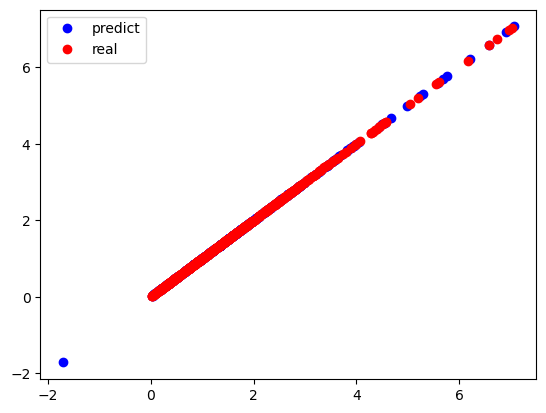

In [37]:
import matplotlib.pyplot as plt

r = len(y_test) + 1

plt.plot( test_y_pred, test_y_pred,'bo' ,label="predict")

plt.plot( y_test, y_test,'ro', label="real")

plt.legend()

In [38]:
print("train")
get_result(y_train, train_y_pred)
print("test")
get_result(y_test, test_y_pred )

train
R2: 0.9701814207727397
RD: [ 0.0169828  -0.00036957 -0.00068578 ...  0.00027497  0.01159092
 -0.0004288 ]
ARD: [0.0169828  0.00036957 0.00068578 ... 0.00027497 0.01159092 0.0004288 ]
AARD: 0.12330742876782175
mse: 0.043636890139975903
rmse: 0.20889444736511284
mae: 0.06780417227619008
test
R2: 0.8008434956165154
RD: [-2.73998423e-01 -7.40648486e-02  4.84765610e-01  1.56172158e-01
 -8.97621032e-01 -7.37143261e-02  4.77177468e-02 -3.77878416e-02
  2.31454786e-01  3.43769329e-02  2.29555809e-01 -1.27014638e-02
  9.19415887e-02  1.86820051e+00 -9.33295317e-03 -9.38473135e-02
  2.28380075e+00 -6.09521618e-02 -3.23308188e-02  6.44625234e-01
  2.83742143e-02 -3.80525400e-03  8.68276830e-02 -2.10066836e-01
  1.50793640e-02 -3.74239793e-02 -9.37586627e-02 -5.73596136e-02
 -2.93631095e-02  2.18259573e-02  2.34574240e-01  3.86599519e-04
  1.91194699e-02  1.02028424e-02  6.53704015e-02 -1.57268850e-02
  3.00484930e-02 -2.38870539e-01  2.77006776e-02 -5.24470799e-02
  2.69432135e-02  1.136561

In [39]:
train_RD = get_rd(y_train, train_y_pred)
train_ARD = get_ard(y_train, train_y_pred)
X_train['RD']=train_RD
X_train['ARD']= train_ARD
X_train['CO2'] = y_train
X_train['type'] ='train'

In [40]:
test_RD = get_rd(y_test, test_y_pred)
test_ARD = get_ard(y_test, test_y_pred)
X_test['RD']=test_RD
X_test['ARD']= test_ARD
X_test['CO2'] = y_test
X_test['type']='test'

In [41]:
X_train.shape

(2000, 52)

In [42]:
X_test.shape

(500, 52)

In [43]:
#输出模型
import pickle
with open('result/svm_regresion_CO2', 'wb') as file:
    pickle.dump(svr_new, file) 

In [44]:
X_train['pred']=train_y_pred
X_test['pred']=test_y_pred

In [45]:
X_train.to_csv('result/X_train_result_SVM_CO2.csv')
X_test.to_csv('result/X_test_result_SVM_CO2.csv')

In [ ]:
#### 代码完